In [5]:
# Bring in dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import os 

# ML models and train split dependenceis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Preprocessing dependencies
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Model accuracy evaluation dependency
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, recall_score, precision_recall_curve



In [8]:
# Fetch data from CSV on local drive
file_path = Path("Resources/healthcare-dataset-stroke-data.csv")
df = pd.read_csv(file_path)
df.head()
                 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Preprocessing Step #1 Review:  Identify Null values?
null = df.isnull().sum()
null



id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
# Preprocessing Step #1: Drop null values
df = df.dropna(how='any', axis=0)
null = df.isnull().sum()
null

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
# Preprocessing Step #2: Reduce features by dropping id and work_type, 
df = df.drop(['id', 'work_type'], axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Rural,166.29,25.6,formerly smoked,0


In [7]:
# Drop the labels to create the X data (features), create y labels
X = df.drop('stroke', axis=1)
X

y = df["stroke"].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [8]:
# Preprocessing Step #2:  one-hot-encode the entire dataframe
X_dummies = pd.get_dummies(X)
print(X_dummies.columns)
X_dummies

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,0,1,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,0,1,0,0,1,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,0,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,1,0,0,1,0,1,0,1,0,0,0
5106,81.0,0,0,125.20,40.0,1,0,0,0,1,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,1,0,0,0,1,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,0,1,1,0,0,1,0,0


In [30]:
# Use imbalance learn package to oversample data to correct for a low percentage of positive stroke patients
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy="minority")
X_over, y_over = oversample.fit_resample(X_dummies, y)
X_over

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,0,1,0,1,0,1,0,0
1,80.0,0,1,105.92,32.5,0,1,0,0,1,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,0,0,0,1,0,1,0,0,0,1
3,79.0,1,0,174.12,24.0,1,0,0,0,1,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,0,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9395,80.0,0,1,66.72,21.7,1,0,0,0,1,1,0,0,1,0,0
9396,71.0,0,0,193.94,22.4,1,0,0,0,1,1,0,0,0,0,1
9397,55.0,1,1,210.40,40.0,1,0,0,0,1,0,1,0,0,0,1
9398,80.0,1,0,240.09,27.0,0,1,0,0,1,0,1,0,0,1,0


In [12]:
# Split data into Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, random_state=1)

In [13]:
# Create a StandardScaler model and fit it to the train and test data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
# Create and score a decision tree classifier
from sklearn import tree


clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
def new_func(clf):
    clf.score(X_train_scaled, y_train)
new_func(clf)
# %%
clf.score(X_train_scaled, y_train)

1.0

In [19]:
#random forest metrics

print(f'Actual:\t\t{list(y_test[:20])}')
print(f'Predicted:\t{list(clf.predict(X_test_scaled[:20]))}')
print(f"Training Data Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf.score(X_test_scaled, y_test)}")
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')


Actual:		[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0]
Predicted:	[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0]
Training Data Score: 1.0
Testing Data Score: 0.9685106382978723
Area Under Curve: 0.771666821195123


In [20]:
#Create random forest confusion matrix
y_true = y_test
y_pred_rf= clf.predict(X_test_scaled)
confusion_matrix(y_true, y_pred_rf)

array([[1092,   74],
       [   0, 1184]], dtype=int64)

In [21]:
#Create random forest classification report  
print(classification_report(y_test, clf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1166
           1       0.94      1.00      0.97      1184

    accuracy                           0.97      2350
   macro avg       0.97      0.97      0.97      2350
weighted avg       0.97      0.97      0.97      2350



<BarContainer object of 16 artists>

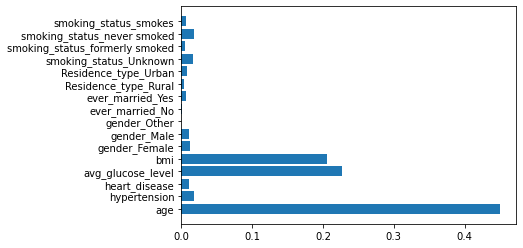

In [31]:
#Plot most important features for random forest
importance=clf.feature_importances_
feature_names=X_over.columns
plt.barh(feature_names,importance)